# Testing Numerical Integrators on Projectile Motion

Due to constant energy drift issues plaguing the double pendulum efforts, the Euler and RK4 integrators are being tested here on a simple problem I understand well: projectile motion

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Acceleration Function

In [2]:
def acceleration():
    # acceleration along x is 0, acceleration along y is downwards at g
    return 0, -g

## Integrators

In [3]:
def euler(x, vx, y, vy, h, t):
    # dx/dt = vx, dvx/dt = ax, dy/dt = vy, dvy/dt = ay, dt = h
    return vx, acceleration()[0], vy, acceleration()[1], t + h

In [4]:
def rk4(x, vx, y, vy, h, t):
    k1 = euler(x, vx, y, vy, h, t)
    k2 = euler(x + 0.5*h*k1[0], vx + 0.5*h*k1[1], y + 0.5*h*k1[2], vy + 0.5*h*k1[3], h, t + 0.5*h)
    k3 = euler(x + 0.5*h*k2[0], vx + 0.5*h*k2[1], y + 0.5*h*k2[2], vy + 0.5*h*k2[3], h, t + 0.5*h)
    k4 = euler(x + h*k3[0], vx + h*k3[1], y + h*k3[2], vy + h*k3[3], h, t + h)
    x = (1 / 6) * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    vx = (1 / 6) * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    y = (1 / 6) * (k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
    vy = (1 / 6) * (k1[3] + 2*k2[3] + 2*k3[3] + k4[3])
    
    return x, vx, y, vy, t + h

## Simulation

In [5]:
def integrate(x, vx, y, vy, h, t0, t1, integrator):
    t = t0
    xs = list()
    vxs = list()
    ys = list()
    vys = list()
    ts = list()
    
    xs.append(x)
    vxs.append(vx)
    ys.append(y)
    vys.append(vy)
    ts.append(t)
    while t < t1:
        state = integrator(x, vx, y, vy, h, t)
        x = x + state[0] * h
        vx = vx + state[1] * h
        y = y + state[2] * h
        vy = vy + state[3] * h
        t = t + h
        
        xs.append(x)
        vxs.append(vx)
        ys.append(y)
        vys.append(vy)
        ts.append(t)
    
    states = {
        "xs": np.array(xs),
        "vxs": np.array(vxs),
        "ys": np.array(ys),
        "vys": np.array(vys),
        "ts": np.array(ts),
    }
    return states

In [6]:
def energy(states):
    potentials = m * g * states["ys"]
    kinetics = 0.5 * m * (states["vxs"]**2 + states["vys"]**2)
    
    energies = {
        "potentials": potentials,
        "kinetics": kinetics,
        "totals": potentials + kinetics,
    }
    
    return energies

In [7]:
def errors(energies):
    print(f'Total energy at t = 0: {energies["totals"][0]} joules')
    print(f'Maximum total energy error: {(energies["totals"] - energies["totals"][0]).max()} joules')
    print(f'Standard deviation in total energy: {energies["totals"].std()} joules')
    print(f'Mean total energy: {energies["totals"].mean()} joules')

## Plotting Functions

In [8]:
def plotTrajectory(states):
    plt.figure(figsize=(10, 8))
    plt.plot(states["xs"], states["ys"])
    plt.title("Trajectory")
    plt.grid()

In [9]:
def plotEnergies(states, energies):
    plt.figure(figsize=(10, 8))
    plt.plot(states["ts"], energies["potentials"], label="Potenital")
    plt.plot(states["ts"], energies["kinetics"], label="Kinetic")
    plt.plot(states["ts"], energies["potentials"] + energies["kinetics"], label="Total")
    plt.title("Energy over Time")
    plt.legend()
    plt.grid()

In [10]:
def plotError(states, energies):
    plt.figure(figsize=(10, 8))
    plt.plot(states["ts"], energies["totals"] - energies["totals"][0], label="Error")
    plt.title("Error in Total Energy over Time")
    plt.legend()
    plt.grid()

In [11]:
m = 1
x = 0
y = 300
vx = 20
vy = 500
g = 9.81
t = 0
h = 0.1

## Testing Euler

In [12]:
states = integrate(x, vx, y, vy, h, t, 100, euler)
energies = energy(states)

In [13]:
errors(energies)

Total energy at t = 0: 128143.0 joules
Maximum total energy error: 481.6616805001104 joules
Standard deviation in total energy: 139.18258597932484 joules
Mean total energy: 128383.8308402505 joules


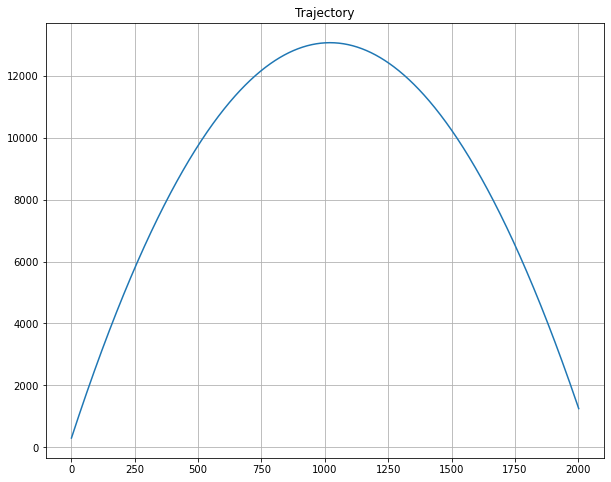

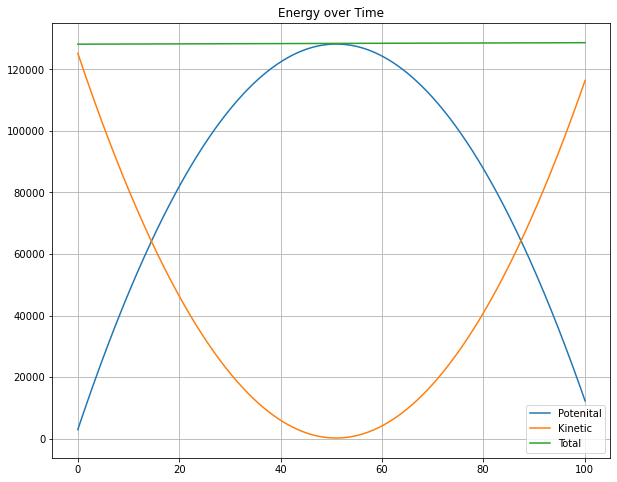

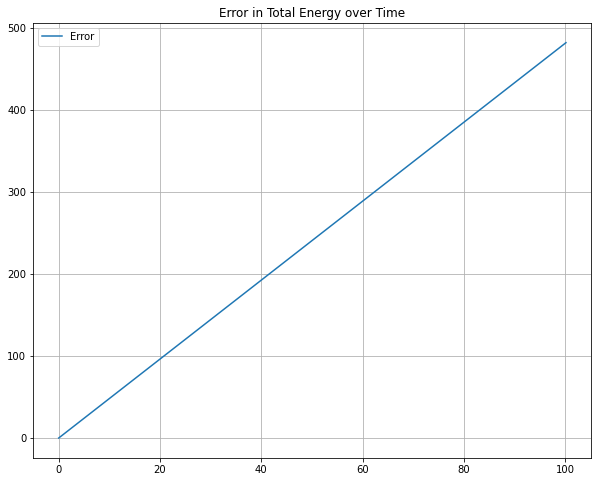

In [14]:
plotTrajectory(states)
plotEnergies(states, energies)
plotError(states, energies)

## Testing RK4

In [15]:
states = integrate(x, vx, y, vy, h, t, 100, rk4)
energies = energy(states)

In [16]:
errors(energies)

Total energy at t = 0: 128143.0 joules
Maximum total energy error: 6.984919309616089e-10 joules
Standard deviation in total energy: 1.9955016902266331e-10 joules
Mean total energy: 128143.00000000048 joules


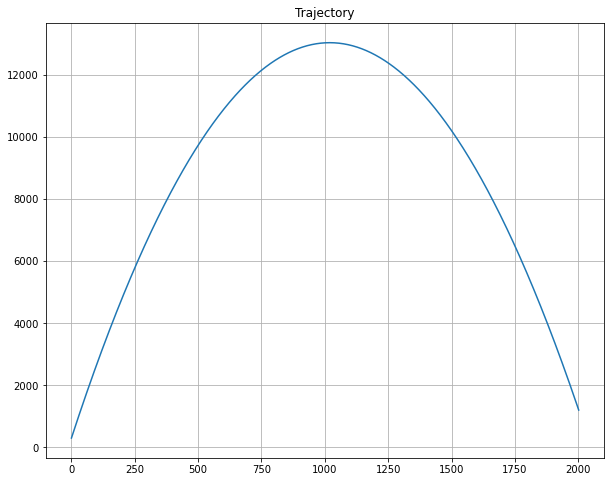

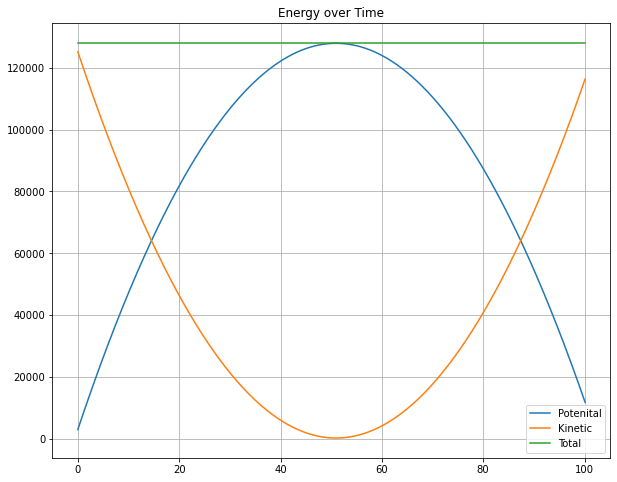

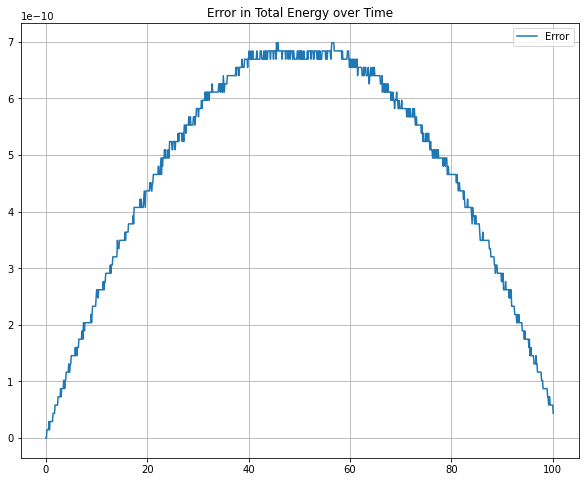

In [17]:
plotTrajectory(states)
plotEnergies(states, energies)
plotError(states, energies)